In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [2]:

df = pd.read_csv('Salary_dataset.csv')

In [3]:
df

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0
5,5,3.0,56643.0
6,6,3.1,60151.0
7,7,3.3,54446.0
8,8,3.3,64446.0
9,9,3.8,57190.0


In [4]:
df.describe()

,Unnamed: 0,YearsExperience,Salary
count,30.000000,30.000000,30.000000
mean,14.500000,5.413333,76004.000000
std,8.803408,2.837888,27414.429785
min,0.000000,1.200000,37732.000000
25%,7.250000,3.300000,56721.750000
50%,14.500000,4.800000,65238.000000
75%,21.750000,7.800000,100545.750000
max,29.000000,10.600000,122392.000000


In [5]:
df.isnull().sum()

Unnamed: 0         0
YearsExperience    0
Salary             0
dtype: int64

In [6]:
df.head()

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0


In [7]:
X = df['YearsExperience'].values
y = df['Salary'].values


In [8]:
X.shape

(30,)

In [9]:
X = (X - np.mean(X)) / np.std(X)
y = (y - np.mean(y)) / np.std(y)


In [10]:
X = X.reshape((-1, 1))
x0 = np.ones((X.shape[0], 1))
X_b = np.hstack((x0, X))

In [11]:
def hypothesis(X, weights):
    return np.dot(X, weights)


In [12]:
def loss_func(X, y, weights):
    loss = 0
    for i in range(X.shape[0]):
        y_pred = hypothesis(X[i], weights)
        loss += (y_pred - y[i]) ** 2
    return loss / X.shape[0]

In [13]:
def gradient(X, y, weights):
    grad = np.zeros(weights.shape)
    for i in range(X.shape[0]):
        y_pred = hypothesis(X[i], weights)
        grad += (y_pred - y[i]) * X[i]
    return grad / X.shape[0]


In [14]:
def gradient_descent(X, y, alpha=0.1, epochs=1000):
    weights = np.zeros(X.shape[1])
    cost_history = []
    for epoch in range(epochs):
        gradient_value = gradient(X, y, weights)
        weights -= alpha * gradient_value
        cost = loss_func(X, y, weights)
        cost_history.append(cost)
    return cost_history, weights


In [15]:
cost_history, weights = gradient_descent(X_b, y)

In [16]:
intercept = weights[0]
slope = weights[1]

In [17]:
y_pred = X_b.dot(weights)


In [18]:
mse = np.mean((y_pred - y) ** 2)

In [19]:
sst = np.sum((y - np.mean(y)) ** 2)
ssr = np.sum((y_pred - np.mean(y)) ** 2)
r2 = ssr / sst


In [20]:
print(f'Intercept: {intercept}')
print(f'Slope: {slope}')
print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

Intercept: -3.3362201889985435e-16
Slope: 0.9782416184887595
Mean Squared Error: 0.04304333585649147
R^2 Score: 0.9569566641435077


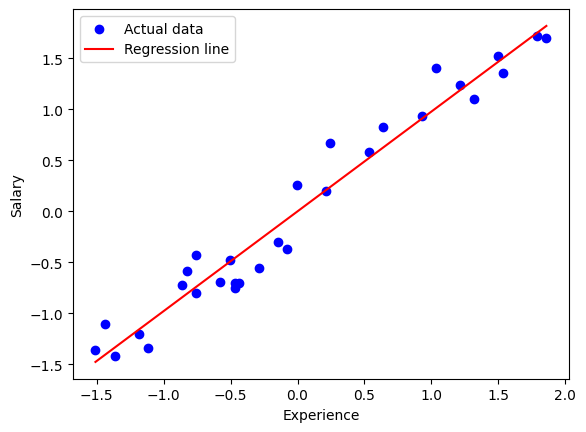

In [21]:
plt.scatter(X[:, 0], y, color='blue', label='Actual data')
plt.plot(X[:, 0], y_pred, color='red', label='Regression line')
plt.xlabel('Experience')
plt.ylabel('Salary')
plt.legend()
plt.show()

In [22]:
weights

array([-3.33622019e-16,  9.78241618e-01])

In [1]:
def predict_salary(years_experience, weights, mean_experience, std_experience, mean_salary, std_salary):
    standardized_experience = (years_experience - mean_experience) / std_experience
    X_new = np.array([1, standardized_experience])
    standardized_salary = np.dot(X_new, weights)
    salary = standardized_salary * std_salary + mean_salary
    return salary


mean_experience = np.mean(df['YearsExperience'])
std_experience = np.std(df['YearsExperience'])
mean_salary = np.mean(df['Salary'])
std_salary = np.std(df['Salary'])


years_experience = float(input())
predicted_salary = predict_salary(years_experience, weights, mean_experience, std_experience, mean_salary, std_salary)
print(f'Predicted Salary for {years_experience} years of experience: ${predicted_salary:.2f}')

NameError: name 'np' is not defined